<a href="https://colab.research.google.com/github/prisilveira/Redi/blob/main/Churn_rates_Kaggle_preject_Priscila%26Oksana%26Shahabub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Download dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import os

# List files in the dataset directory
os.listdir(path)

######## Explanation
## You need to run import os because you're using functions from the "os" module — like:

#    os.listdir() = lists files in a directory

#    os.path.join() = safely constructs a file path regardless of the operating system

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [ ]:
import pandas as pd

# os path joins the info saved in path with the file name so that it can be read correctly by pd.read_csv() function
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Load into DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking the type of data in each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#how many columns and lines in the dataset
df.shape

(7043, 21)

In [ ]:
#some basic stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#list column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   #convert text (categorical) data into numbers.

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)] # Identifies the columns that are non-numeric (i.e., not included in .describe() which summarizes numeric columns).

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i]) #Applies Label Encoding (e.g., 'Male' → 1, 'Female' → 0) and replaces the column in df1 with its numeric version.
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
customerID  :  [5375 3962 2564 ... 3367 5934 2226]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mail

In [ ]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male
gender


[np.float64(50.24077046548957), np.float64(49.75922953451043)]

In [ ]:
seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes
seniorcitizen


[np.float64(74.53183520599251), np.float64(25.468164794007492)]

In [ ]:
partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes
partner


[np.float64(64.20545746388443), np.float64(35.79454253611557)]

In [ ]:
dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes
dependents

[np.float64(82.55751738897807), np.float64(17.442482611021937)]

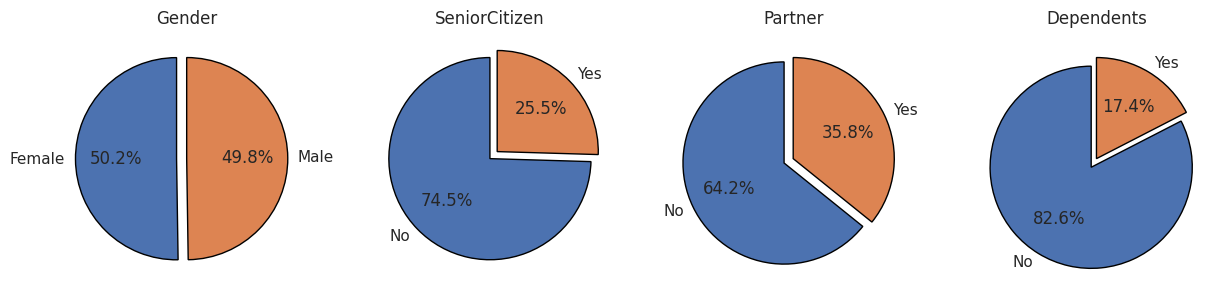

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

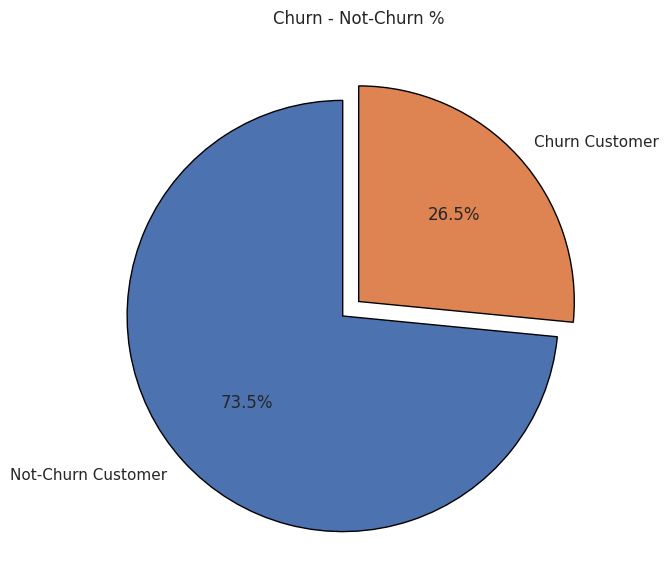

In [ ]:
#  Seaborn default "deep" palette
colors = ['#4C72B0', '#DD8452']  # Not churned (blue), Churned (orange)

# Assuming 'Churn' is a categorical variable with values 'Yes' and 'No'
l = list(df1['Churn'].value_counts())  # Count occurrences of churn categories
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]  # Calculate percentages

# Create a figure for the pie chart
fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart for churned vs not churned
ax.pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
          colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

ax.set_title('Churn - Not-Churn %')

# Show the plot
plt.show()

**OVERVIEW OF THE DATASET**

For visualization purposes, we will exclude the target variable, "Churn," from the list of categorical features. This allows for a focused examination of how other categorical attributes influence the likelihood of customer churn.

In [ ]:
#Dividing features into Numerical and Categorical :

col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : customerID tenure MonthlyCharges TotalCharges


In [ ]:
categorical_features.remove('Churn') #remove the categorical feature

In [ ]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

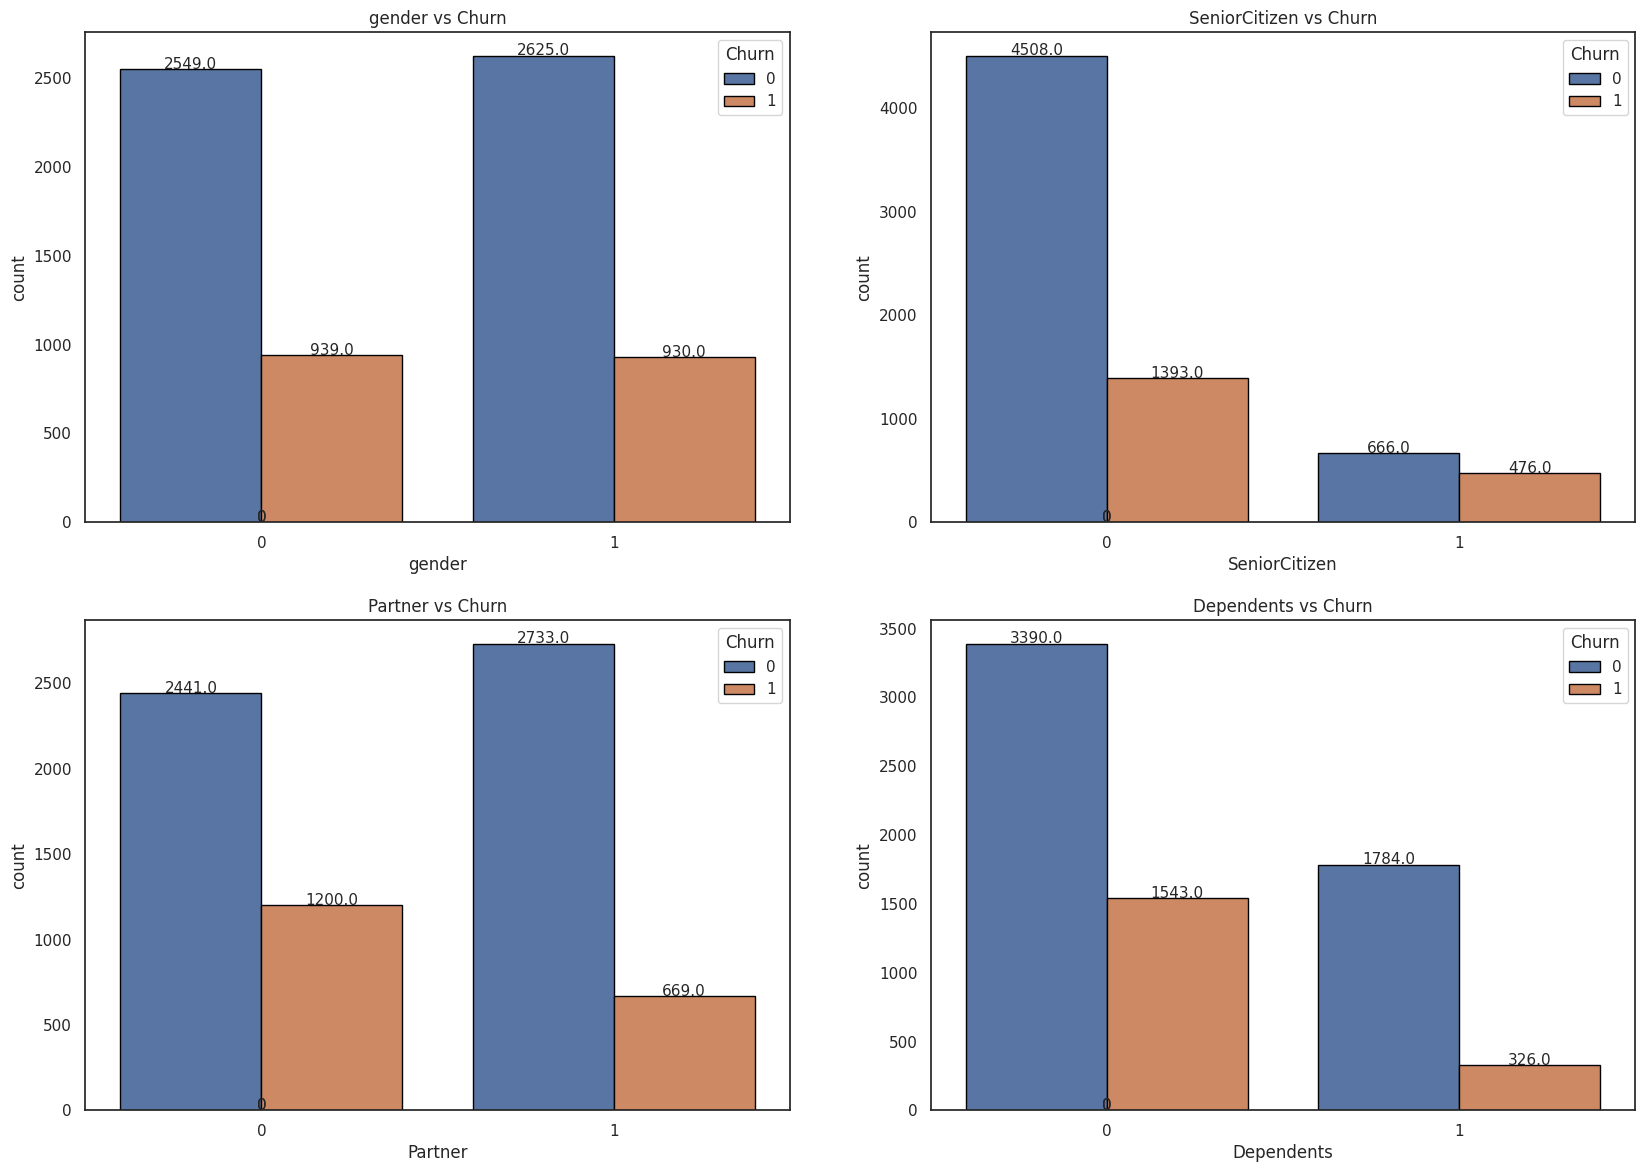

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

**Exploring the types of contracts**

In [ ]:
#checking the number of contracts
contract_counts = df['Contract'].value_counts()
contract_counts



,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


plotting

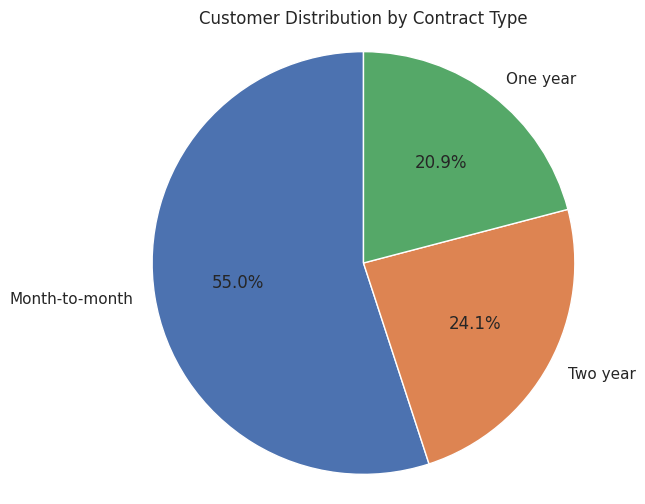

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Contract Type')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

In [ ]:
df[df['Churn']=='Yes']['Contract'].value_counts()

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


In [ ]:
#What are Women's preferred type of contract?
df[df['gender']=='Female']['Contract'].value_counts()

,count
Contract,
Month-to-month,1925
Two year,845
One year,718


In [ ]:
#What are Men's preferred type of contract?
df[df['gender']=='Male']['Contract'].value_counts()

,count
Contract,
Month-to-month,1950
Two year,850
One year,755


In [ ]:
# Do people paying with credit card tend to have protected devices?
df[df['PaymentMethod']=='Credit card (automatic)']['DeviceProtection'].value_counts()


,count
DeviceProtection,
Yes,677
No,514
No internet service,331


Gender does not play a role. CHurn rates are balanced between genders.

Seniors drop less, they are more loyal customers.



Understanding the data of month-to-month customers

In [ ]:
#What are the average time that montly contract last until they churn excluding the customers that have one and two year contract?
df[df['Contract']=='Month-to-month']['tenure'].describe()

,tenure
count,3875.000000
mean,18.036645
std,17.689054
min,1.000000
25%,3.000000
50%,12.000000
75%,29.000000
max,72.000000


In average, clients pay the services for 18 months until they churn. However, there is a lot of variation around the mean. This shows there is a high heterogeneity in the time that clients keeps paying for the service.

Then, to understand this behavior better, we check the mode in Tenure (the most frequent value). The mode is 1. This means that most of the clients are paying the service for 1 month only and just a few people are paying for longer periods.

To go a bit deeper on Churn behavior of Month-to-Month clients, we can analyse the quartiles.
The data shows that 25% of the clients stay 3 months until they quit.

The median indicates that 50% of the clients drop before 12 months and the other 50% quit the services after that period.

the 3rd quartile indicates that 75% of the clients stays  UP TO 29 months while the other 25% stay longer.

In [ ]:
#adding Moda and Variance to the table generated by .describe()
print("Mode:", df[df['Contract']=='Month-to-month']['tenure'].mode().values)
print("Variance:", df[df['Contract']=='Month-to-month']['tenure'].var())

Mode: [1]
Variance: 312.9026320049286


In [ ]:
# Filter the data
monthly_tenure = df[df['Contract'] == 'Month-to-month']['tenure']

# Describe returns a Series, convert it to a DataFrame
summary = monthly_tenure.describe()

# Convert to DataFrame (single-row format for appending new rows)
summary_df = summary.to_frame().T

# Calculate mode and variance
mode = monthly_tenure.mode().iloc[0]   # take the first mode in case of multiple
variance = monthly_tenure.var()

# Add mode and variance as new columns
summary_df['mode'] = mode
summary_df['variance'] = variance

print(summary_df)

         count       mean        std  min  25%   50%   75%   max  mode  \
tenure  3875.0  18.036645  17.689054  1.0  3.0  12.0  29.0  72.0     1   

          variance  
tenure  312.902632  


In [ ]:
# Filter the data
monthly_tenure = df[df['Contract'] == 'Month-to-month']['tenure']

# Get the describe summary (as a Series)
summary = monthly_tenure.describe()

# Convert to DataFrame (each statistic as a row)
summary_df = summary.to_frame(name='tenure')

# Calculate mode and variance
mode = monthly_tenure.mode().iloc[0]    # in case multiple modes
variance = monthly_tenure.var()

# Append mode and variance as new rows
summary_df.loc['mode'] = mode
summary_df.loc['variance'] = variance

print(summary_df)

               tenure
count     3875.000000
mean        18.036645
std         17.689054
min          1.000000
25%          3.000000
50%         12.000000
75%         29.000000
max         72.000000
mode         1.000000
variance   312.902632


In [ ]:
#What are the average time that montly contract last until they churn excluding the customers that have one and two year contract?
# all the other contracts that are not month-to-month.
#First check which are the values present in the column contract?
print(df['Contract'].unique())


#df[df['Contract']=='Month-to-month']['tenure'].describe()

['Month-to-month' 'One year' 'Two year']


Checking the number of contracts that quit and do not quit the contracts. Desistence proportions

In [ ]:
df_contract_percentage=pd.crosstab(df['Contract'], df['Churn'])   # the pd crosstab function counts how many times combinations of values from two (or more) variables occur together.
print(df_contract_percentage)


Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


Let's add columns in the resulting dataframe from the code above to show the percentage of Churns and non-Churn clients

In [ ]:
# Calculate the percentage of Churn (Yes) by row. The default in pandas (axis=0) is to calculate by columns
#we had to add the argument (axis=1) to do that.
df_contract_percentage['Percentage Churn (Yes)'] = df_contract_percentage['Yes'] / df_contract_percentage.sum(axis=1) * 100

# Calculate the percentage of Non-Churn (No) by subtracting from 100
df_contract_percentage['Percentage Churn (No)'] = 100 - df_contract_percentage['Percentage Churn (Yes)']

# Print the crosstab with both Percentage Churn (Yes) and Churn (No)
print(df_contract_percentage)

Churn             No   Yes  Percentage Churn (Yes)  Percentage Churn (No)
Contract                                                                 
Month-to-month  2220  1655               42.709677              57.290323
One year        1307   166               11.269518              88.730482
Two year        1647    48                2.831858              97.168142


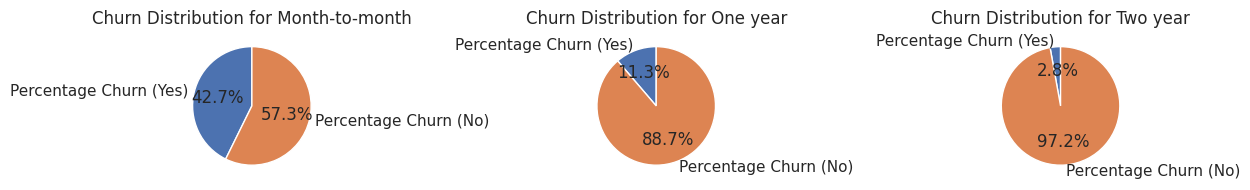

In [ ]:
# Now, let's create pie charts based on the percentages for Churn (Yes) and Churn (No)
# Plot pie charts for each contract type

import seaborn as sns # seaborn is necessary to improve the plots from Matplotlib
import matplotlib.pyplot as plt  #matplotlib is a foundational package in Python necessary to set up a plot and plot's elements (axis, lables etc)

# Set Seaborn's color palette for default colors
sns.set(style="white")

# Define the Seaborn color palette for Churn (Yes) and Non-Churn (No)
#this is necesssary for matching the colors of the subsequent plots.
colors = sns.color_palette("deep", 2)

# Plotting the pie charts
plt.figure(figsize=(12, 6))

# Create pie charts for each row (contract type)
for i, contract in enumerate(df_contract_percentage.index):   #the function enumerate iterate over a collection (list, tuple, DataFrame)
                                                              #and get both the index and the value of each item in the collection.
    plt.subplot(1, 3, i+1)                                    # One row, three columns of pie charts
    percentages = df_contract_percentage.loc[contract,
    ['Percentage Churn (Yes)', 'Percentage Churn (No)']]       #here we are iterating with the function loc because it allows to access labels and not index as the iloc method does
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Churn Distribution for {contract}')

# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()

Making a violin plot because we can also show the amount of data observation for each category in the plot

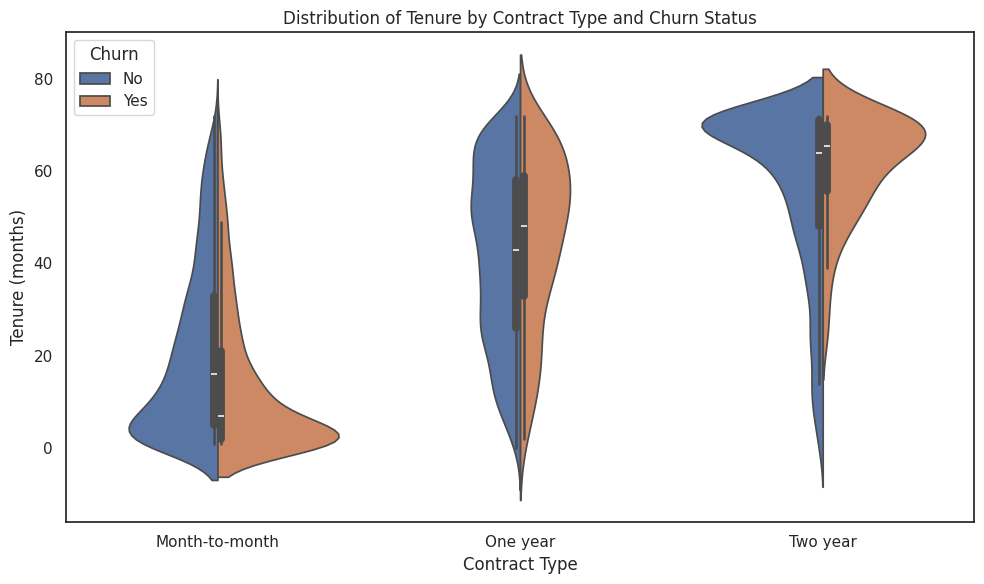

In [ ]:
# Set plot style
sns.set(style="white")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Contract', y='tenure', hue='Churn', split=True)

# Customize the plot
plt.title('Distribution of Tenure by Contract Type and Churn Status')
plt.ylabel('Tenure (months)')
plt.xlabel('Contract Type')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Now, getting a descriptive table with statistics to help interpreting the plots. To do that, we can group the data into 2 categories (Churn: Yes, No) for each contract type. Then, the goal is to add columns with the Mode and the Variance.

In [ ]:
#First, doing it the simple way to check if our grouping argument is working and delivering what we want.
df2=df.groupby(['Contract','Churn'])['tenure'].describe()
df2

count       mean        std   min    25%   50%   75%  \
Contract       Churn                                                          
Month-to-month No     2220.0  21.033333  18.398051   1.0   5.00  16.0  33.0   
               Yes    1655.0  14.016918  15.828615   1.0   2.00   7.0  21.0   
One year       No     1307.0  41.674063  19.094012   0.0  26.00  43.0  58.0   
               Yes     166.0  44.963855  18.367261   2.0  33.00  48.0  59.0   
Two year       No     1647.0  56.602914  18.362330   0.0  48.00  64.0  71.0   
               Yes      48.0  61.270833  11.004331  25.0  55.75  65.5  70.0   

                       max  
Contract       Churn        
Month-to-month No     72.0  
               Yes    71.0  
One year       No     72.0  
               Yes    72.0  
Two year       No     72.0  
               Yes    72.0

In [ ]:
#now adding the column mode and variance for each group to the dataframe

#First we have to calculate the mode of tenure for each group
#the function lambda is necessary to calculate the mode of the column tenure in each group category(combination of Contract' and 'Churn')
# Since mode() returns a series of modes (in case there are multiple modes), .iloc[0] selects the first mode, in this case we can use iloc to enter indexes.
mode_values = df.groupby(['Contract', 'Churn'])['tenure'].apply(lambda x: x.mode().iloc[0])

#since the var returns a single value for each group combination of Contract and Churn... it is not necessary to use apply and iterate with iloc
variance_values = df.groupby(['Contract', 'Churn'])['tenure'].var()

# Add the mode and variance as new columns to df2
df2['mode'] = mode_values
df2['variance'] = variance_values

# Display the updated df2
print(df2)

                       count       mean        std   min    25%   50%   75%  \
Contract       Churn                                                          
Month-to-month No     2220.0  21.033333  18.398051   1.0   5.00  16.0  33.0   
               Yes    1655.0  14.016918  15.828615   1.0   2.00   7.0  21.0   
One year       No     1307.0  41.674063  19.094012   0.0  26.00  43.0  58.0   
               Yes     166.0  44.963855  18.367261   2.0  33.00  48.0  59.0   
Two year       No     1647.0  56.602914  18.362330   0.0  48.00  64.0  71.0   
               Yes      48.0  61.270833  11.004331  25.0  55.75  65.5  70.0   

                       max  mode    variance  
Contract       Churn                          
Month-to-month No     72.0     1  338.488298  
               Yes    71.0     1  250.545058  
One year       No     72.0    51  364.581279  
               Yes    72.0    53  337.356261  
Two year       No     72.0    72  337.175156  
               Yes    72.0    70  121.

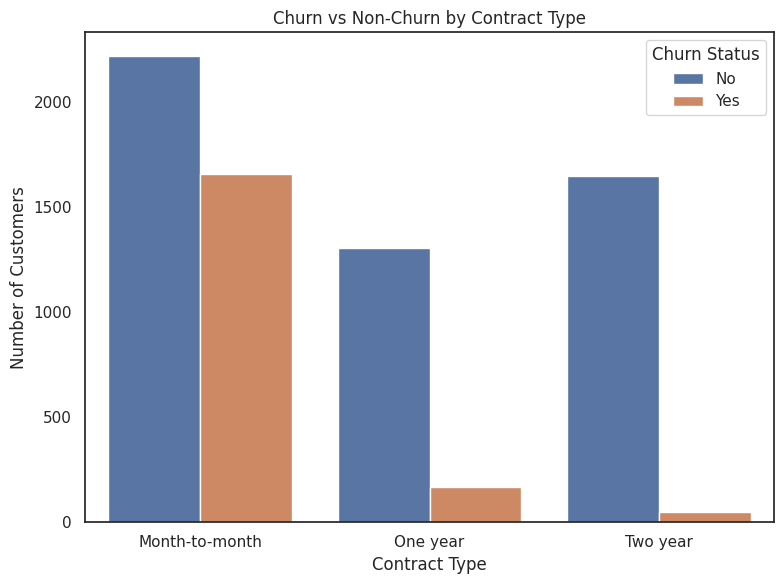

In [ ]:
# Count customers by Contract and Churn status
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=contract_churn_counts, x='Contract', y='Count', hue='Churn', palette='deep')

# Customize plot
plt.title('Churn vs Non-Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

DIAGNOSIS:

The most common contract type is a monthly (Month-to-Month) one. Followed by

Which type of contract brings the highest revenue?

In [ ]:
#create new column called lifetime revenue
df['LifetimeRevenue'] = df['tenure'] * df['MonthlyCharges']

In [ ]:
#calculate contract profitability
contract_profitability = df.groupby('Contract')['LifetimeRevenue'].agg(['count', 'mean', 'sum']).sort_values(by='mean', ascending=False)
print(contract_profitability)

                count         mean         sum
Contract                                      
Two year         1695  3706.759676  6282957.65
One year         1473  3029.828955  4462938.05
Month-to-month   3875  1370.115032  5309195.75


The mean shows which contract is most profitable per customer and the Sum shows which contract the overall profits.

Mean = average revenue per customer (profitability per customer).
Sum = otal revenue generated by all customers in that contract type.

<ipython-input-86-1dd8acc79e6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue, x='Contract', y='LifetimeRevenue', palette='deep', edgecolor='black')


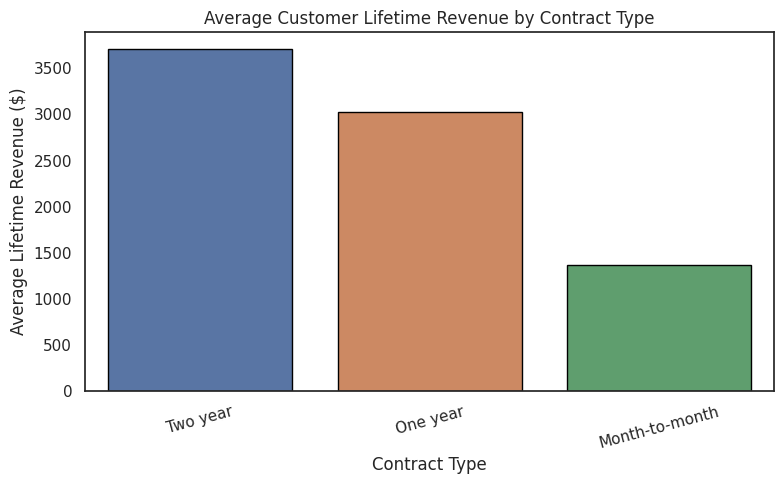

In [ ]:
# Calculate average lifetime revenue per contract type
avg_revenue = df.groupby('Contract')['LifetimeRevenue'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_revenue, x='Contract', y='LifetimeRevenue', palette='deep', edgecolor='black')
plt.title('Average Customer Lifetime Revenue by Contract Type')
plt.ylabel('Average Lifetime Revenue ($)')
plt.xlabel('Contract Type')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

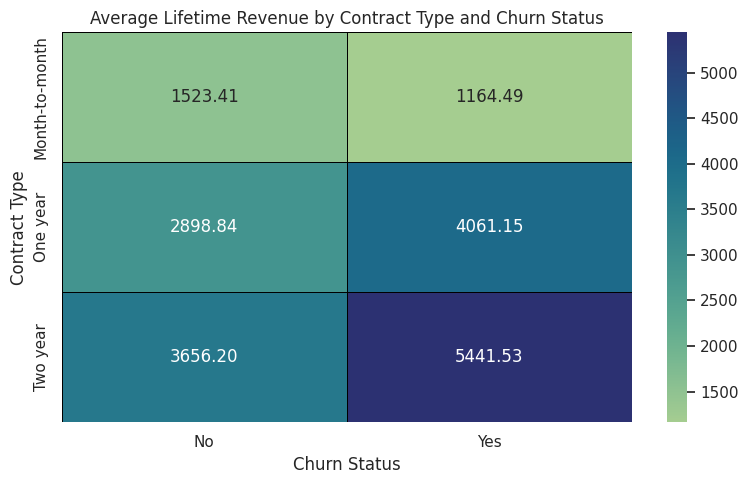

In [ ]:
# Group and pivot data
heat_data = df.groupby(['Contract', 'Churn'])['LifetimeRevenue'].mean().unstack()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, fmt='.2f', cmap='crest', linewidths=0.5, linecolor='black')
plt.title('Average Lifetime Revenue by Contract Type and Churn Status')
plt.ylabel('Contract Type')
plt.xlabel('Churn Status')
plt.tight_layout()
plt.show()